<a href="https://colab.research.google.com/github/OlegKret/---/blob/master/lab8_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target variable not found or not specified. Using default coloring.


<ipython-input-2-5298915e2e4b>:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y if y is not None else 'gray', cmap='viridis')
<ipython-input-2-5298915e2e4b>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y if y is not None else 'gray', cmap='viridis')
<ipython-input-2-5298915e2e4b>:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y if y is not None else 'gray', cmap='viridis')
<ipython-input-2-5298915e2e4b>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y if y is not None else 'gray', cmap='viridis'

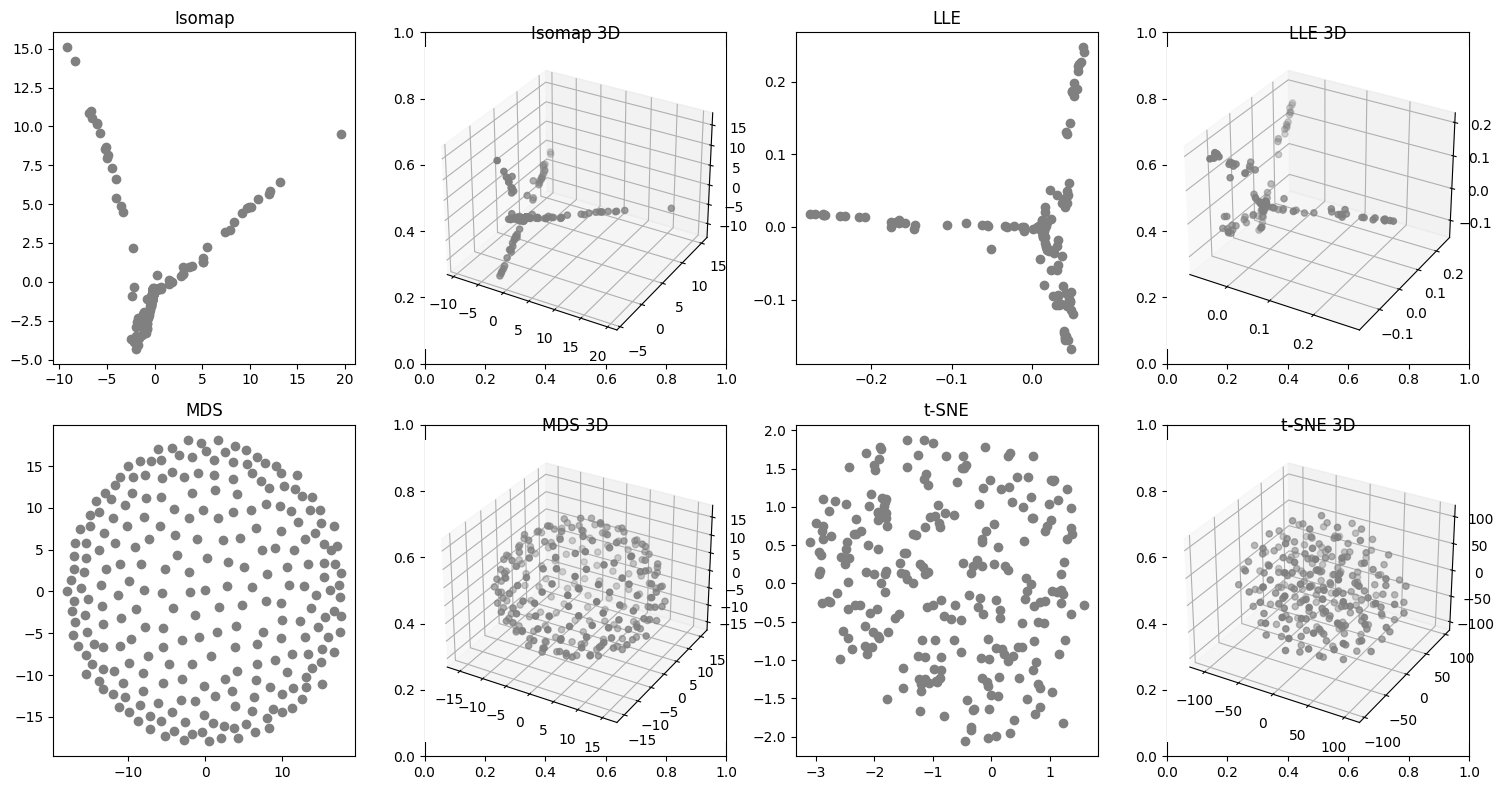

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, TSNE
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("/content/sample_data/buddymove_holidayiq.csv")

# Preprocessing: Handle categorical features & standardize numerical features
df = pd.get_dummies(df, drop_first=True) # One-hot encode categorical features

X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Extract a target variable (if applicable)
try:
  # Replace 'your_target_column' with the actual column name in your dataset
  y = df['your_target_column'].values
except KeyError:
  y = None
  print("Target variable not found or not specified. Using default coloring.")

# Dimensionality reduction methods
methods = [
    ('Isomap', Isomap(n_components=2)),
    ('Isomap 3D', Isomap(n_components=3)),
    ('LLE', LocallyLinearEmbedding(n_components=2, n_neighbors=10)),
    ('LLE 3D', LocallyLinearEmbedding(n_components=3, n_neighbors=10)),
    ('MDS', MDS(n_components=2)),
    ('MDS 3D', MDS(n_components=3)),
    ('t-SNE', TSNE(n_components=2, init='pca')),
    ('t-SNE 3D', TSNE(n_components=3, init='pca')),
]

# Plot settings
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

# Perform dimensionality reduction and plot
for i, (name, method) in enumerate(methods):
    X_transformed = method.fit_transform(X_scaled)  # Use scaled data

    if X_transformed.shape[1] == 2:  # 2D plots
        ax = axes[i]
        scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y if y is not None else 'gray', cmap='viridis')
        if y is not None:  # Only add legend if target variable exists
          legend1 = ax.legend(*scatter.legend_elements(),
                      loc="lower left", title="Classes")
          ax.add_artist(legend1)
        ax.set_title(name)
    else:  # 3D plots
        ax = fig.add_subplot(2, 4, i+1, projection='3d')
        scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y if y is not None else 'gray', cmap='viridis')
        if y is not None:  # Only add legend if target variable exists
          legend1 = ax.legend(*scatter.legend_elements(),
                      loc="lower left", title="Classes")
          ax.add_artist(legend1)
        ax.set_title(name)

plt.tight_layout()
plt.show()